<a href="https://colab.research.google.com/github/abdullahamruf/Mosquito/blob/main/ensemble_other_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/model-05-0.8400.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
model_2 = load_model('/content/drive/MyDrive/model2-05-0.5667.hdf5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')

In [3]:
model_3 = load_model('/content/drive/MyDrive/resnetmosquito-04-0.8000.hdf5')
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')

In [4]:
models = [model_1, model_2 ,model_3]
model_input = Input(shape=(299, 299, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [5]:
import tensorflow as tf

In [6]:
base_learning_rate = 0.001
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [7]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

In [8]:
IMG_SIZE = (299, 299)  # resolution
directory = "/content/drive/MyDrive/Mosquito_Raw"
BATCH_SIZE = 128
import os
from sklearn.model_selection import train_test_split


# Original directory
original_directory = "/content/drive/MyDrive/Mosquito_Raw"

# Create train/validation/test split
train_dir, test_dir = train_test_split(os.listdir(original_directory), test_size=0.2, random_state=42)
train_dir, val_dir = train_test_split(train_dir, test_size=0.1, random_state=42)

# Create training dataset
train_dataset = image_dataset_from_directory(
    original_directory,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,
    subset='training',
    color_mode='rgb',
    seed=42
)

# Create validation dataset
validation_dataset = image_dataset_from_directory(
    original_directory,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,
    subset='validation',
    color_mode='rgb',
    seed=42
)

# Create testing dataset
test_dataset = image_dataset_from_directory(
    original_directory,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # Adjust the split if needed
    subset='validation',  # Note: Use 'validation' here as it's common practice
    color_mode='rgb',
    seed=42
)

Found 3578 files belonging to 6 classes.
Using 2863 files for training.
Found 3578 files belonging to 6 classes.
Using 715 files for validation.
Found 3578 files belonging to 6 classes.
Using 715 files for validation.


In [9]:
sns.set_theme(style="whitegrid")
Data_imbalance = []
for folder in os.listdir(directory):
    files = gb.glob(pathname=str(directory + "/" + folder +"/*.*"))
    Data_imbalance.append(len(files))
# plt.figure(figsize=(13,7))
# sns.barplot(x=[ "Aedes aegypti landing", "EUS", "Aedes aegypti smashed","Aedes albopictus smashed","Culex quinquefasciatus landing","Culex quinquefasciatus smashed"], y=Data_imbalance, palette="rocket")
# plt.show()

In [10]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

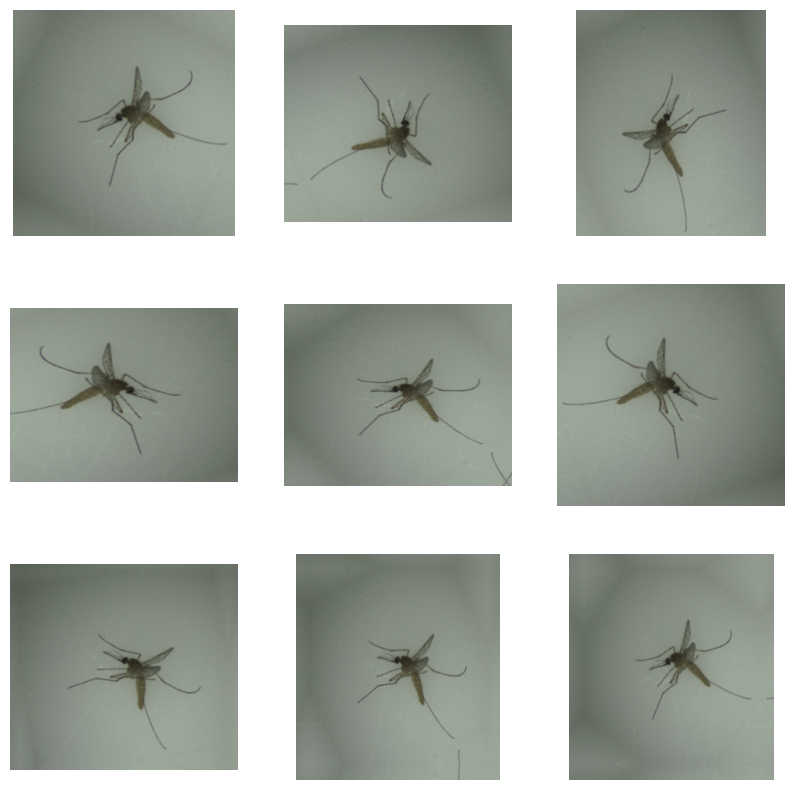

In [11]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [12]:
# total = 0
# for i in range(0,len(Data_imbalance)) :
#     total +=Data_imbalance[i]

# weight_for_0 = (1 / Data_imbalance[0]) * (total / 3.0)
# weight_for_1 = (1 / Data_imbalance[1]) * (total / 3.0)
# weight_for_2 = (1 / Data_imbalance[2]) * (total / 3.0)
# # weight_for_3 = (1 / Data_imbalance[3]) * (total / 6.0)
# # weight_for_4 = (1 / Data_imbalance[3]) * (total / 6.0)
# # weight_for_5 = (1 / Data_imbalance[3]) * (total / 6.0)

# class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

# print('Weight for class 0: {:.2f}'.format(weight_for_0))
# print('Weight for class 1: {:.2f}'.format(weight_for_1))
# print('Weight for class 2: {:.2f}'.format(weight_for_2))
# # print('Weight for class 3: {:.2f}'.format(weight_for_3))
# # print('Weight for class 4: {:.2f}'.format(weight_for_4))
# # print('Weight for class 5: {:.2f}'.format(weight_for_5))


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
model_filepath="/content/drive/MyDrive/Colab Notebooks/emsemble-2-best-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath = model_filepath ,
    monitor ='val_accuracy',
    mode = 'max' ,
    save_best_only =True ,
     verbose = 1

)

In [15]:
history = ensemble_model.fit(train_dataset , verbose=2 , epochs=100 ,
                               validation_data=validation_dataset , use_multiprocessing= True )

Epoch 1/100
23/23 - 150s - loss: 1.8338 - accuracy: 0.2606 - val_loss: 1.4173 - val_accuracy: 0.3650 - 150s/epoch - 7s/step
Epoch 2/100
23/23 - 73s - loss: 1.3523 - accuracy: 0.4408 - val_loss: 1.1737 - val_accuracy: 0.5427 - 73s/epoch - 3s/step
Epoch 3/100
23/23 - 73s - loss: 1.1558 - accuracy: 0.5648 - val_loss: 1.0556 - val_accuracy: 0.5832 - 73s/epoch - 3s/step
Epoch 4/100
23/23 - 73s - loss: 1.0544 - accuracy: 0.6130 - val_loss: 0.9779 - val_accuracy: 0.6643 - 73s/epoch - 3s/step
Epoch 5/100
23/23 - 74s - loss: 1.0001 - accuracy: 0.6490 - val_loss: 0.9232 - val_accuracy: 0.7035 - 74s/epoch - 3s/step
Epoch 6/100
23/23 - 74s - loss: 0.9408 - accuracy: 0.6808 - val_loss: 0.8879 - val_accuracy: 0.7245 - 74s/epoch - 3s/step
Epoch 7/100
23/23 - 73s - loss: 0.9066 - accuracy: 0.6916 - val_loss: 0.8458 - val_accuracy: 0.7469 - 73s/epoch - 3s/step
Epoch 8/100
23/23 - 73s - loss: 0.8515 - accuracy: 0.7321 - val_loss: 0.7973 - val_accuracy: 0.7678 - 73s/epoch - 3s/step
Epoch 9/100
23/23 - 73

In [16]:
from tensorflow.keras.models import load_model

In [28]:
ensemble_model.evaluate(test_dataset , verbose = 1)

6/6 [==============================] - 15s 2s/step - loss: 0.4140 - accuracy: 0.9832


[0.413968950510025, 0.9832167625427246]

In [18]:
class_names = train_dataset.class_names
class_names

['Aedes albopictus',
 'Aedes vexans',
 'Anopheles sinensis',
 'Culex pipiens',
 'Culex tritaeniorhynchus',
 'Non vectors']

1/1 [==============================] - 0s 32ms/step


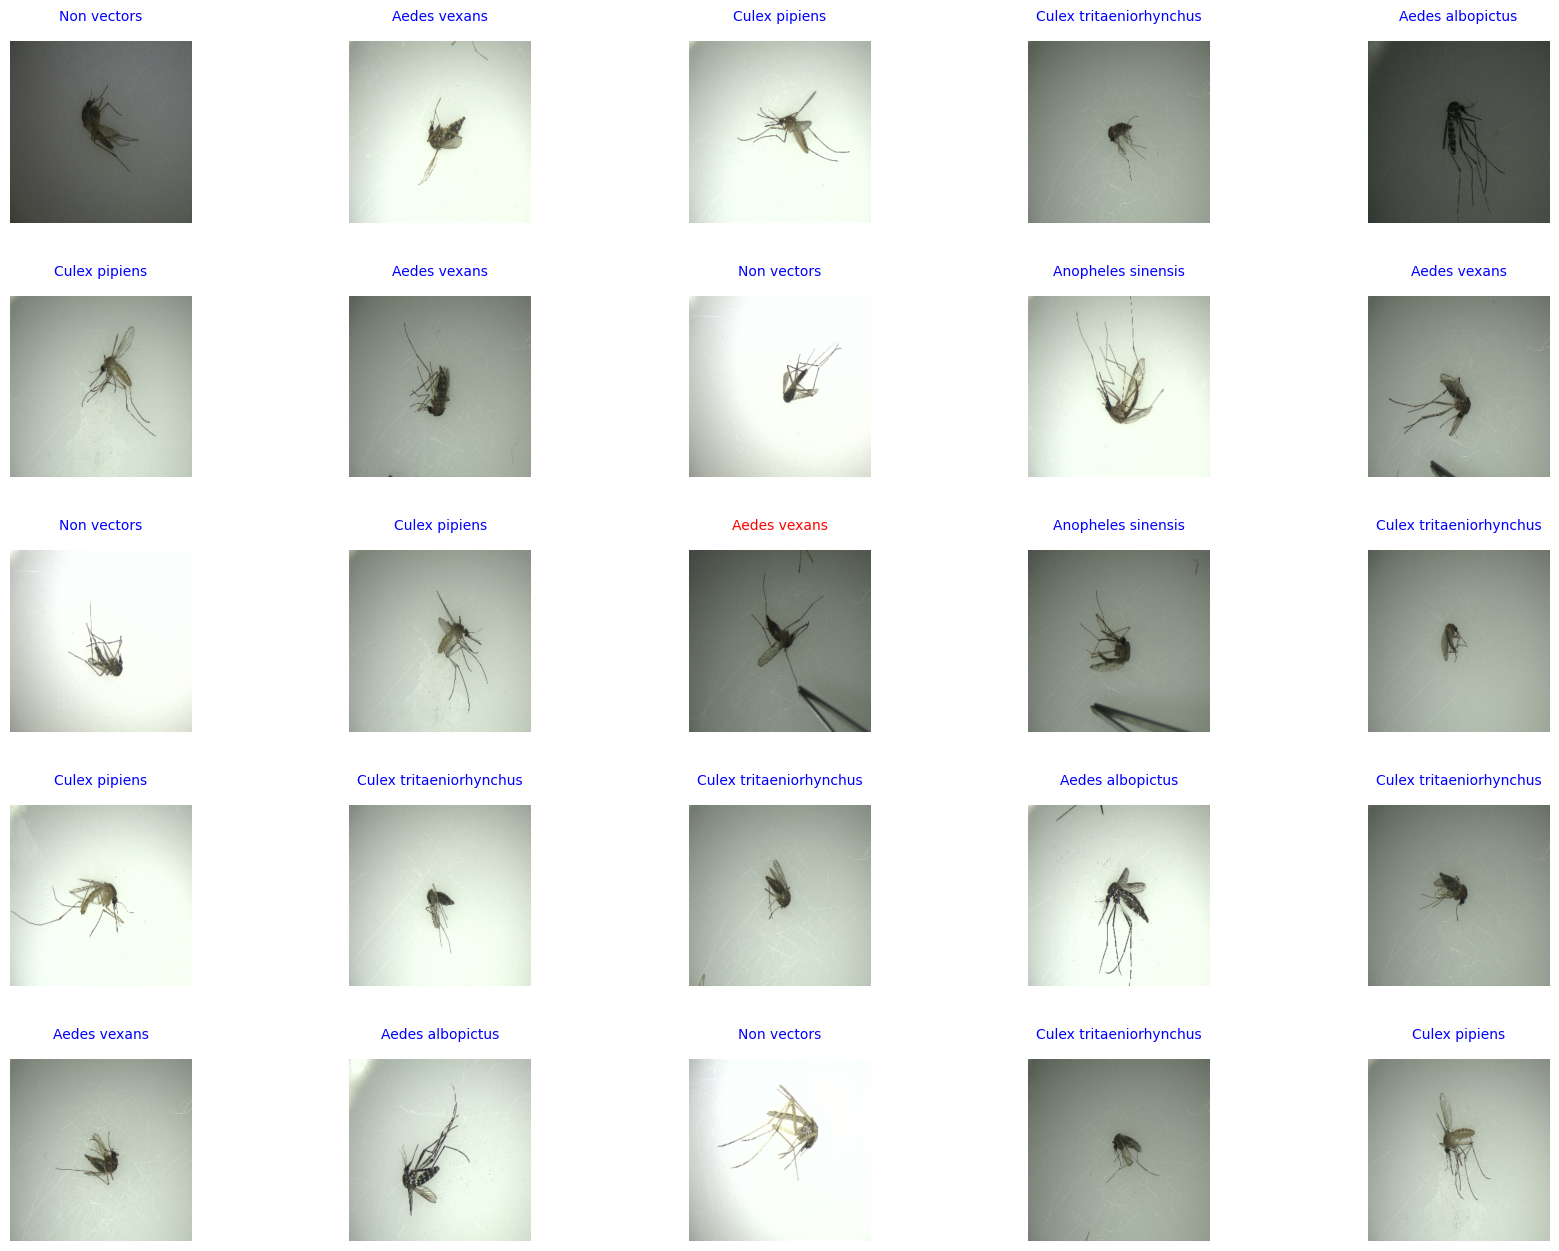

In [19]:
plt.figure(figsize=(20, 15))
for images, labels in test_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = ensemble_model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

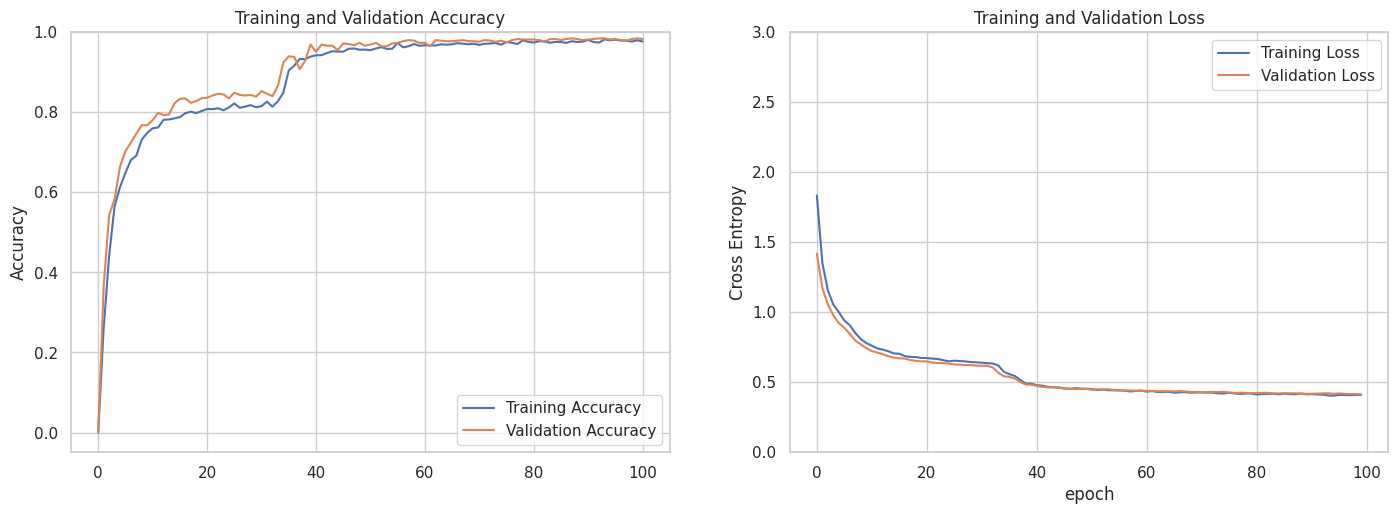

In [20]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

3/3 [==============================] - 8s 3s/step


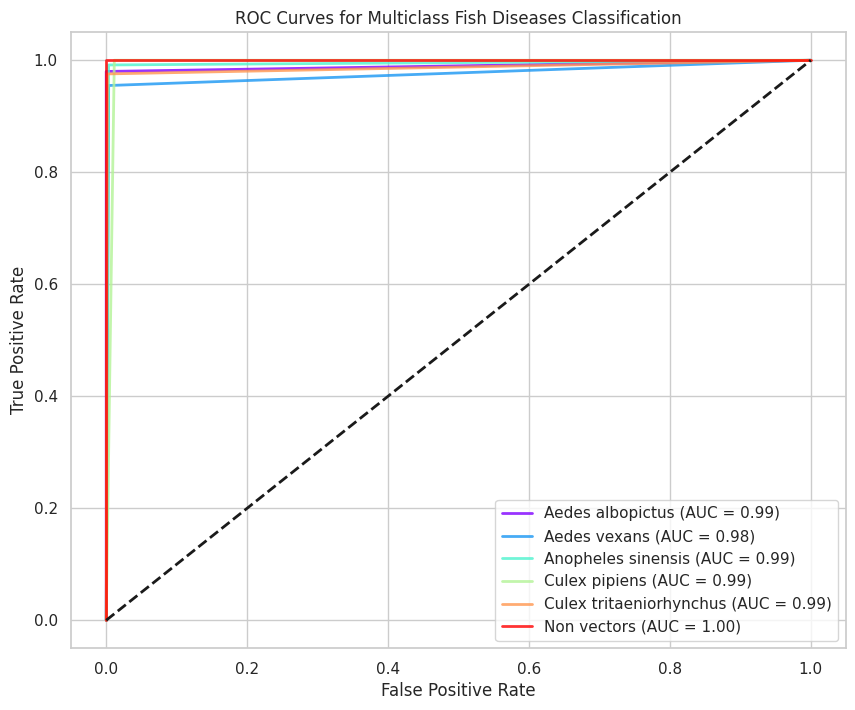

ROC AUC for Aedes albopictus: 0.9900
ROC AUC for Aedes vexans: 0.9757
ROC AUC for Anopheles sinensis: 0.9941
ROC AUC for Culex pipiens: 0.9943
ROC AUC for Culex tritaeniorhynchus: 0.9870
ROC AUC for Non vectors: 1.0000
                         precision    recall  f1-score   support

       Aedes albopictus       1.00      0.98      0.99       100
           Aedes vexans       0.98      0.95      0.97       133
     Anopheles sinensis       0.98      0.99      0.99       119
          Culex pipiens       0.94      1.00      0.97       104
Culex tritaeniorhynchus       0.99      0.98      0.98       123
            Non vectors       1.00      1.00      1.00       136

               accuracy                           0.98       715
              macro avg       0.98      0.98      0.98       715
           weighted avg       0.98      0.98      0.98       715



In [21]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = ensemble_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

# Compute class-specific ROC AUC values
roc_auc_per_class = []
for i in range(len(class_names)):
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc_per_class.append(roc_auc)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Plot class-specific ROC curves with different colors and line styles
plt.figure(figsize=(10, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(class_names)))

for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr, tpr,
        label=f'{class_names[i]} (AUC = {roc_auc:.2f})',
        color=color,
        linestyle='-',  # You can customize line styles here
        linewidth=2,  # You can customize line width here
        alpha=0.8  # You can customize transparency here
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Fish Diseases Classification')
plt.legend(loc='lower right')
plt.grid(True)  # Add a grid for better readability
plt.show()

# Print class-specific ROC AUC values
for i in range(len(class_names)):
    print(f'ROC AUC for {class_names[i]}: {roc_auc_per_class[i]:.4f}')

# Print the classification report
print(report)


In [22]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels, predicted_labels)
print(f'Cohen\'s Kappa: {kappa:.4f}')

Cohen's Kappa: 0.9798


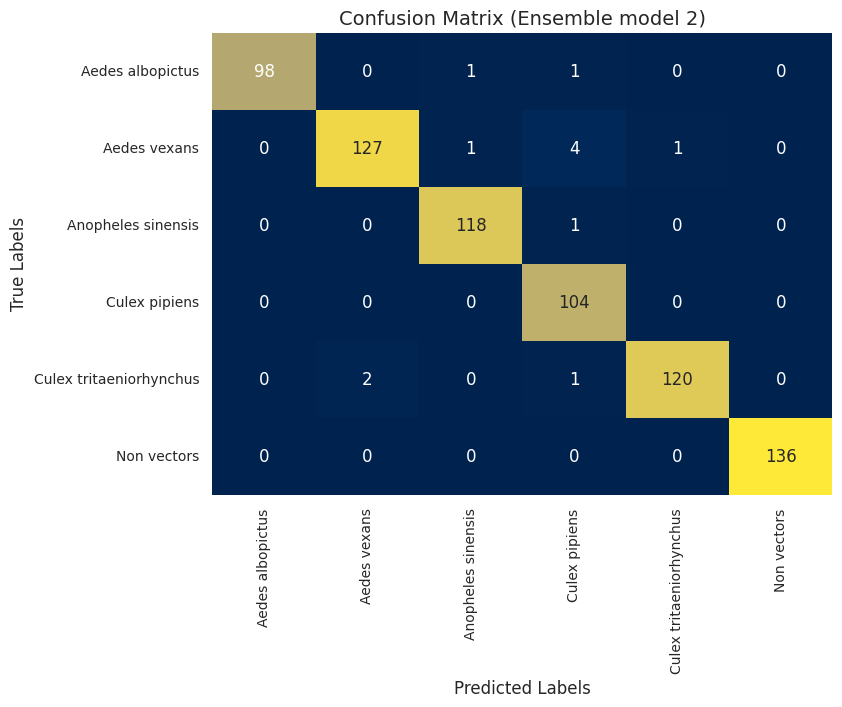

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Set a custom color palette (cividis is a good choice for accessibility)
custom_palette = sns.color_palette("cividis", as_cmap=True)

# Plot the confusion matrix as a heatmap with custom styling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix (Ensemble model 2)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [24]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

# Assuming true_labels and predicted_labels are your multiclass labels
mcc_values = [matthews_corrcoef(true_labels == i, predicted_labels == i) for i in np.unique(true_labels)]

average_mcc = np.mean(mcc_values)
print(f'Average Matthews Correlation Coefficient for Multiclass: {average_mcc:.4f}')


Average Matthews Correlation Coefficient for Multiclass: 0.9798


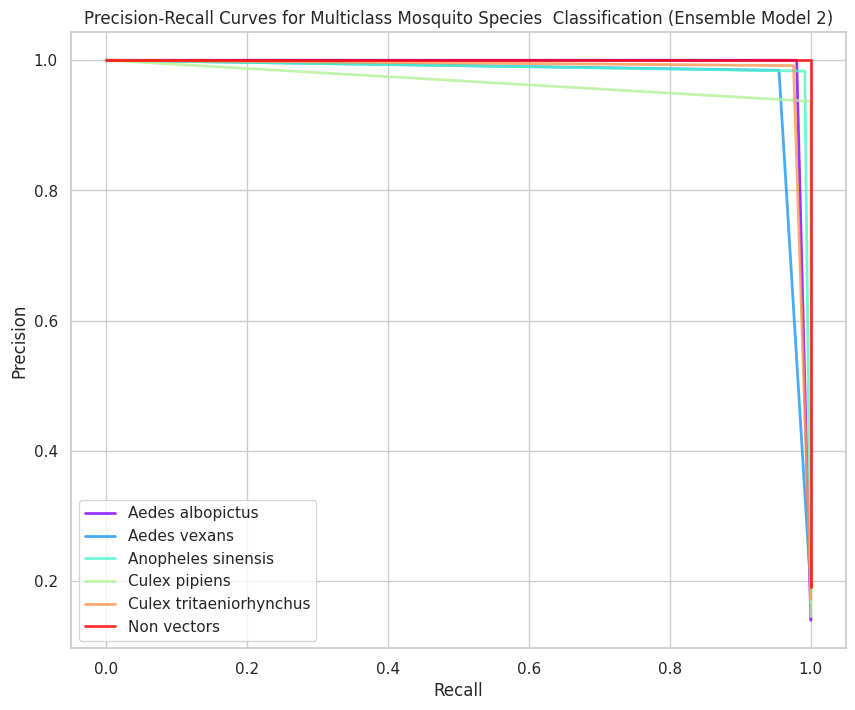

In [25]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    plt.plot(
        recall, precision,
        label=f'{class_names[i]}',
        color=color,
        linestyle='-',
        linewidth=2,
        alpha=0.8
    )

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multiclass Mosquito Species  Classification (Ensemble Model 2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


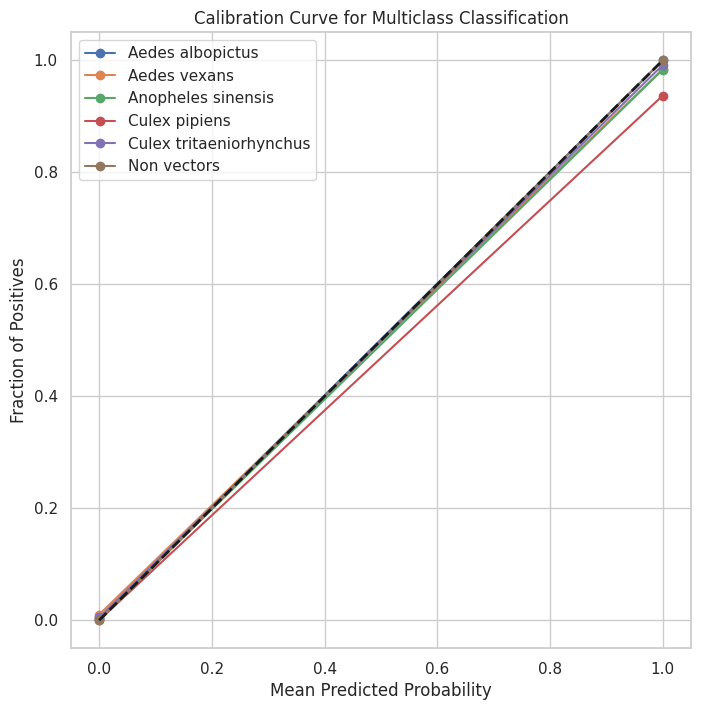

In [26]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 8))

for i in range(len(class_names)):
    prob_true, prob_pred = calibration_curve(true_labels_bin[:, i], predicted_labels_bin[:, i], n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=f'{class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Multiclass Classification')
plt.legend(loc='upper left')
plt.show()

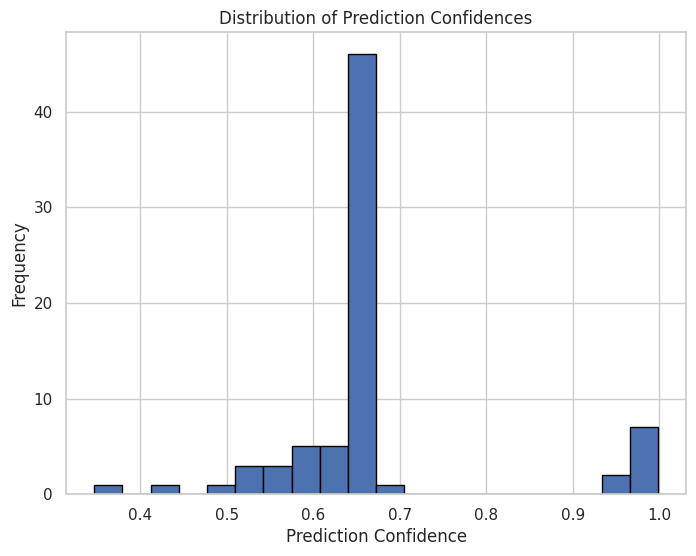

In [27]:
# Assuming predictions is a matrix of predicted probabilities for each class
prediction_confidences = np.max(predictions, axis=1)

# Plot histogram of prediction confidences
plt.figure(figsize=(8, 6))
plt.hist(prediction_confidences, bins=20, edgecolor='black')
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Confidences')
plt.show()